<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Identifying and Controlling West Nile Virus Hotspots

# Overview

### Introduction
The West Nile virus (WNV) is the leading cause of mosquito-borne disease in the continental United States. The virus is most commonly spread to people by the bite of an infected mosquito, although it can also spread through organ transplant, blood transfusions and breast milk ([CDC](https://www.cdc.gov/westnile/index.html)).

Most people infected with the WNV do not feel sick. Of those infected, 1 in 5 develop mild symptoms while 1 in 150 develop a serious, sometimes fatal, illness. Nonetheless, it is important to note that there is currently no human vaccine available. As such, the only way to reduce infection in people is by  reducing exposure to the virus ([WHO, 2017](https://www.who.int/news-room/fact-sheets/detail/west-nile-virus)).

### Problem Statement
As an analyst in the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE), you have been tasked to predict when and where different species of mosquitos will test positive for WNV in the City of Chicago. Subsequently, a cost-benefit analysis will be conducted. This should include annual cost projections for various levels of pesticide coverage (cost) and the effect of these various levels of pesticide coverage (benefit).

As there are significant human and economic costs to erroneous identification of WNV areas, relying on one success metric will not be practical. Having a large amount of false positives will result in an increased economic cost from spraying multiple locations with pesticides. On the other hand, a large amount of false nagatives will result in an increased human cost due to many people falling severly ill, and a potentially greater economic cost from drastic virus containment measures. 

**Goal:**
In favour of reducing human fatalities and the possiibility of an uncontained outbreak, the team will focus on minimising false negatives over false positives. This would mean placing greater emphasise on `sensitivity` rather than `specificity`** without sacrificing too much on `Accuracy`. We will also observe the `Precision` of the model to understand the quality of a positive prediction made by the model (ie. the increase in false positives for additional true positives).


### Method
**1) Data Cleaning and Exploratory Data Analysis**
- Understand the data in the train, test, spray and weather datasets
- Perform data cleaning and extract essential features for further analysis
- Plot distributions locations of WNV across the years
- Merge required data for subsequent analysis 

**2) Feature Engineering and Selection**
- Engineer features (e.g. temporal, species, weatherlag etc.) which will be required for modelling
- Perform preliminary analysis to narrow down on the features to be used for modelling and tuning
- Save datasets for modelling and Kaggle test

**3) Modelling and Tuning**
- Analyse data using a variety of algorithms such as RandomForest, Support Vector Classification, XGBoost
- Tune model hyperparameters to improve model performace.

**4) Cost Benefit Analysis**
- Understand the implications of the model chosen in terms of financial and public health costs

### Part1: Data cleaning and exploratory data analysis

# Contents

Data Cleaning and Exploratory Data Analysis:
- [Train & Test Datasets](#Data-cleaning-and-EDA-(Train-&-Test-Dataset))
- [Weather Dataset](#Data-cleaning-and-EDA-(Weather))
- [Spray Dataset](#Data-cleaning-and-EDA-(Spray))

Merge and save datasets:
- [Merging Datasets](#Merging-of-all-Datasets)
- [Save Datasets](#Save-merged-data-(train-+-weather-+-spray))

Deeper Exploratory Data Analysis:
- [Deeper Exploratory Data Analysis](#Deeper-Exploratory-Data-Analysis)

In [3]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)

# pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_columns', 50)  # or 1000

In [4]:
# Import data

test = pd.read_csv('../assets/test.csv')
train = pd.read_csv('../assets/train.csv')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

## Data cleaning and EDA (Train & Test Dataset)

In [5]:
train.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
# convert all to lower case
train.columns = [word.lower() for word in train.columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [8]:
# Check null values
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

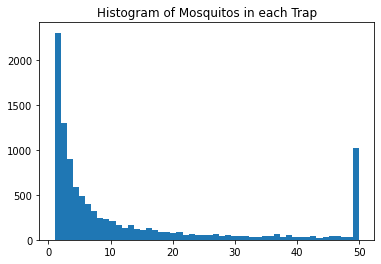

In [9]:
# Inspec Distribution of mosquitos

plt.hist(train['nummosquitos'], bins=50)
plt.title("Histogram of Mosquitos in each Trap");

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50.

**Assumption**<br/>
If the mosquito traps are only inspected ONCE a day, we will only expect more than one entry for the specific location/trap/date if one of the entry has 50 mosquitos.

In [10]:
# Check if our assumption above is true
# Create a list of columns without 'nummosquitos'

col_w = list(train.columns)
col_w.remove('nummosquitos') # this includes all the column names except for 'nummosquitos'

In [11]:
# Inspect dulplicated rows where number of mosquito count is less than 50

mos_u50 = train.loc[train['nummosquitos']<50,:] # slice data for nummosquitos < 50

dup = mos_u50[col_w].duplicated(keep=False) # find index of data which have same are duplicates except 'nummosquitos'

In [12]:
# View some data which are duplicates except 'nummosquitos'

mos_u50[dup][:6] 

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,2,0
294,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,35,0
296,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,8,0


There are entries that have the same date, location, trap with different number of mosquitos. This means our prior asumption is not true.

This means that the data is not entered as we expect. These could be due to data entry errors, traps are checked more than once a day or others. However, it is impossible to discern. We will assume that all datapoints are VALID. (ie. traps are checked several times a day or the like.)

In [13]:
# As there are duplicates, we will collapse those rows and further explore the data
# Such that there can only be a maximum of ONE wnvpresent in each Trap each day for each species

col_w.remove('wnvpresent') # col_w includes all columns except wnvpresent and nummosquitos

train_1 = train.groupby(col_w, as_index=False).sum()    # To merge rows if they have the same date, location, trap

# Refresh 'wnvpresent' variable (ie wnvpresent indicates whether the trap has wnv or not)
train_1['wnvcount'] = train_1['wnvpresent']
train_1['wnvpresent'] = train_1['wnvpresent'].map(lambda x: 1 if x > 0 else 0)


In [14]:
# base rate of wnvpresent AFTER transformation

train_1['wnvpresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: wnvpresent, dtype: float64

In [15]:
# Inspect mosquito species and WNV presence

train_1.groupby(['species'])[['nummosquitos', 'wnvpresent']].agg({'nummosquitos': ['sum'],
                                                                'wnvpresent': ['sum', 'mean']})

nummosquitos wnvpresent          
                                sum        sum      mean
species                                                 
CULEX ERRATICUS                   7          0  0.000000
CULEX PIPIENS                 44671        184  0.094359
CULEX PIPIENS/RESTUANS        66268        225  0.058808
CULEX RESTUANS                23431         48  0.020059
CULEX SALINARIUS                145          0  0.000000
CULEX TARSALIS                    7          0  0.000000
CULEX TERRITANS                 510          0  0.000000

Most of the mosquitos found are Culex Pipiens and Culex Restuans which are the only species which were detected to have the West Nile Virus. This is because this two species are more common in the US. Nonetheless, all the species of Culex indicated can potentially transmitt the virus.([CDC](https://www.cdc.gov/westnile/resources/pdfs/MosquitoSpecies1999-2016.pdf))

In [16]:
# To further collapse species those rows and further explore the data
# Such that there can only be a maximum of ONE wnvpresent in each Trap each day

# Create dataframe which collapse the species column for Visualisation

col_w.remove('species') # ie all columns except wnvpresent, nummosquitos amd species

train_2 = train_1.groupby(col_w, as_index=False).sum()

# Refresh 'wnvpresent' variable (ie if wnvpresent or not)
train_2['wnvpresent'] = train_2['wnvpresent'].map(lambda x: 1 if x > 0 else 0)

In [17]:
# Create a dataframe for each year with lat long and the cumulative occurence of virus
# col_w.remove('species')
to_keep = ['date', 'latitude', 'longitude', 'wnvpresent']

train_plot = train_2[to_keep].copy()

train_plot['date'] = pd.to_datetime(train_plot['date']) # convert date type
train_plot['year'] = train_plot['date'].dt.year         # create another column of date
train_plot.drop(columns='date', inplace=True)


train_plot = train_plot.groupby(['year', 'latitude', 'longitude']).sum() # collapse rows that have same values in columns col_w
train_plot.reset_index(inplace=True)    # create new df from those collapsed rows

train_plot.rename(columns={'wnvpresent': 'wnvcount', # Rename column names to the appropriate one
                       }, inplace=True)

train_plot_2007 = train_plot.loc[train_plot['year']==2007, :]
train_plot_2009 = train_plot.loc[train_plot['year']==2009, :]
train_plot_2011 = train_plot.loc[train_plot['year']==2011, :]
train_plot_2013 = train_plot.loc[train_plot['year']==2013, :]

Text(0.5, 1.0, 'Traps with WNV - 2013')

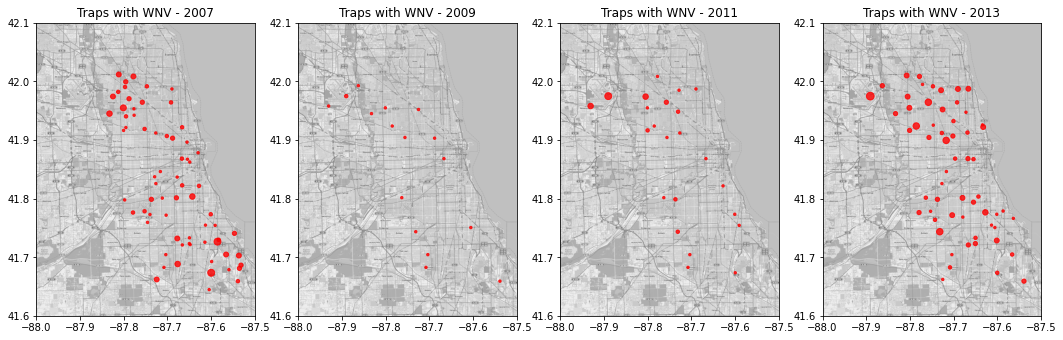

In [18]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)


# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

In [19]:
train_plot_2007_top = train_plot_2007.sort_values('wnvcount', ascending=False)[:5]
train_plot_2009_top = train_plot_2009.sort_values('wnvcount', ascending=False)[:5]
train_plot_2011_top = train_plot_2011.sort_values('wnvcount', ascending=False)[:5]
train_plot_2013_top = train_plot_2013.sort_values('wnvcount', ascending=False)[:5]

Text(0.5, 1.0, 'Traps with WNV - 2013')

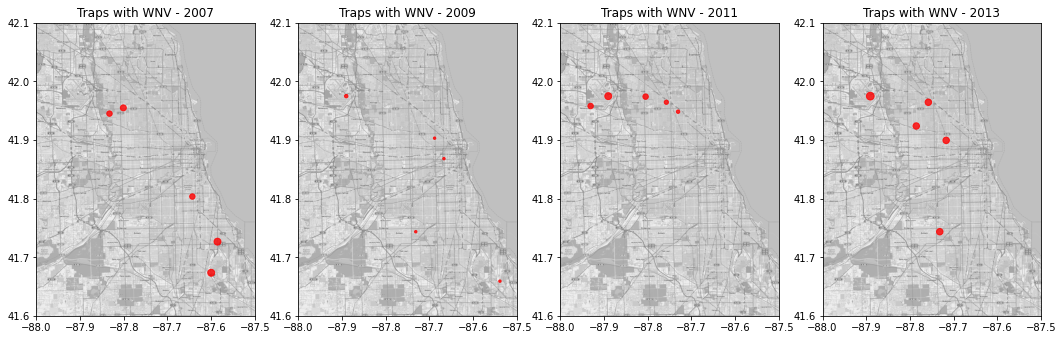

In [20]:
# Plot for 2007
fig,ax = plt.subplots(figsize=(18,18), nrows=1, ncols=4)
ax[0].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2007 = train_plot_2007_top.loc[:, ['longitude', 'latitude']]

ax[0].scatter(locations_2007['longitude'], locations_2007['latitude'],
            s=train_plot_2007_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[0].set_title('Traps with WNV - 2007')


# Plot for 2009
ax[1].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2009 = train_plot_2009_top.loc[:, ['longitude', 'latitude']]

ax[1].scatter(locations_2009['longitude'], locations_2009['latitude'],
            s=train_plot_2009_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[1].set_title('Traps with WNV - 2009')

# Plot for 2011
ax[2].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2011 = train_plot_2011_top.loc[:, ['longitude', 'latitude']]

ax[2].scatter(locations_2011['longitude'], locations_2011['latitude'],
            s=train_plot_2011_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[2].set_title('Traps with WNV - 2011')

# Plot for 2013
ax[3].imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_2013 = train_plot_2013_top.loc[:, ['longitude', 'latitude']]

ax[3].scatter(locations_2013['longitude'], locations_2013['latitude'],
            s=train_plot_2013_top.loc[:, ['wnvcount']]*6,
            alpha=0.8,
            c='red')
ax[3].set_title('Traps with WNV - 2013')

Top 5 highest mosquito counts coming from these 5 locations. 

In [21]:
# Select rows required for analysis in train and test set

# train data
train_to_save = train_1[['date', 'species', 'latitude', 'longitude', 'trap',
                         'nummosquitos', 'wnvpresent', 'wnvcount']]

# test data
test.columns = [word.lower() for word in test.columns]
test_to_save = test[['id', 'date', 'species', 'latitude', 'longitude', 'trap']]


**Save cleaned train and test data to csv**

In [22]:
# Save cleaned data to csv

train_to_save.to_csv(r'../data/train_clean.csv', index = False) # combine rows where date/location/trap is the same
                                                          # nummosquitos are summed
                                                          # wnvpresent = 1 if wnvpresent >0

test_to_save.to_csv(r'../data/test_clean.csv', index = False)

## Data cleaning and EDA (Weather)
- There will also be a section to create different weather lags for subsequent analysis

In [23]:
# convert all to lower case
weather.columns = [word.lower() for word in weather.columns]

In [24]:
# convert date time 
weather['date'] = weather['date'].map(lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [25]:
# create month column 
weather['month'] = weather['date'].dt.month

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       2944 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   object        
 8   heat         2944 non-null   object        
 9   cool         2944 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     2944 non-null   object        
 16  precip

In [27]:
print(f'Total rows for weather: {weather.shape[0]}\n')
for col in weather.columns:
    if 'M' in weather[col].unique().tolist():
        count = weather[col].value_counts()['M']
        print(f'Column {col} has {count} number of "M"');

Total rows for weather: 2944

Column tavg has 11 number of "M"
Column depart has 1472 number of "M"
Column wetbulb has 4 number of "M"
Column heat has 11 number of "M"
Column cool has 11 number of "M"
Column depth has 1472 number of "M"
Column water1 has 2944 number of "M"
Column snowfall has 1472 number of "M"
Column preciptotal has 2 number of "M"
Column stnpressure has 4 number of "M"
Column sealevel has 9 number of "M"
Column avgspeed has 3 number of "M"


### Approach to handle missing data

- `water1` need to drop as majority are missing values 
- `depart, depth, snowfall` have quite alot of missing values as well, need to see what are the unique values and its distribution to judge if it is usefull. 
- the `rest` will need to do imputation 

In [28]:
# drop water1 rows since majority is M  
weather.drop(columns='water1', inplace = True)

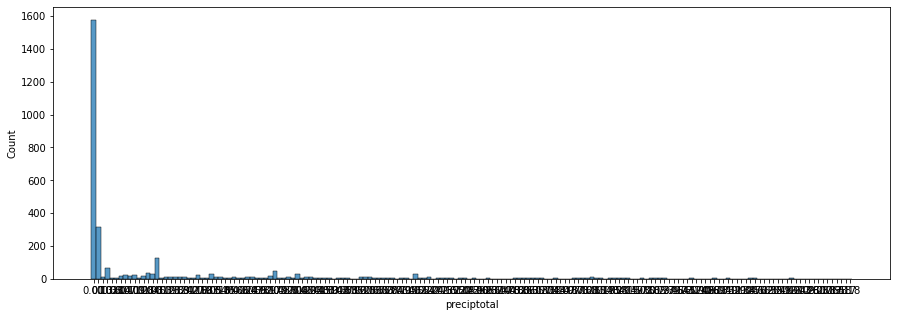

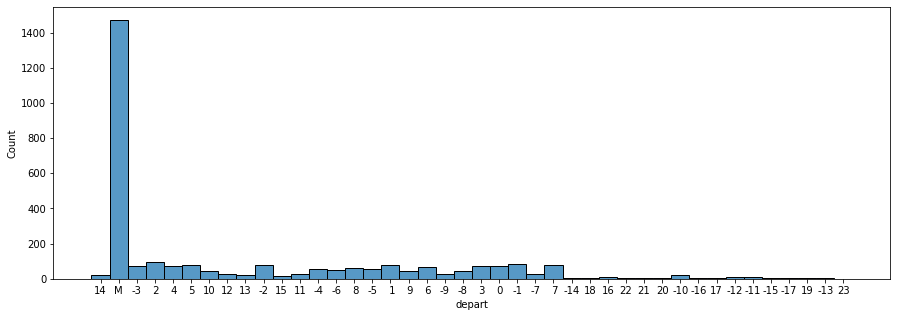

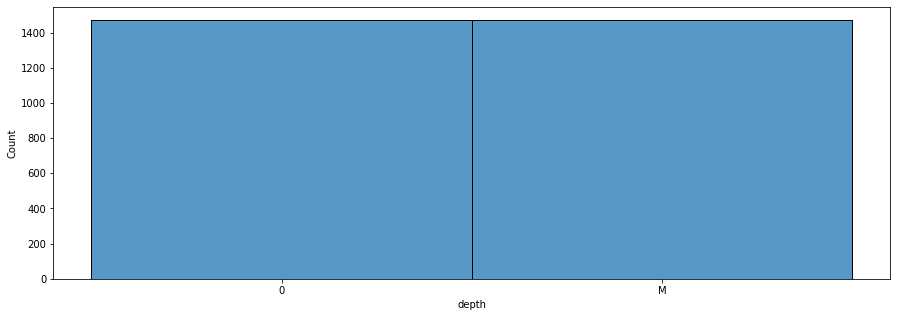

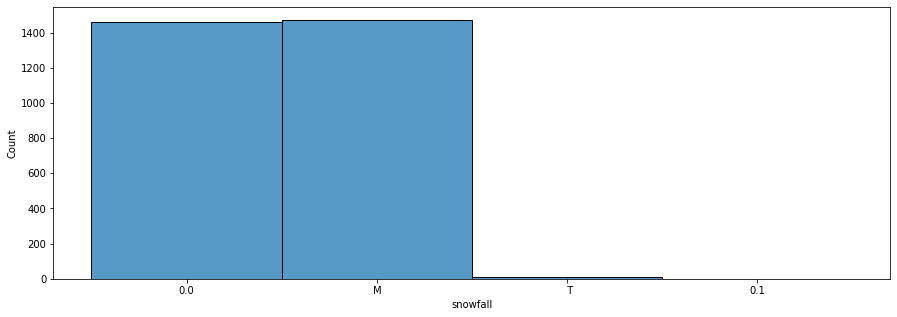

In [29]:
for col in ['preciptotal','depart','depth', 'snowfall']:
    plt.figure(figsize=(15,5))
    sns.histplot(x = col, data = weather)

Need to drop snowfall and depth since not much information to impute. 

Noticed there are `trace` amounts in snowfall and precipitation

In [30]:
weather[weather.snowfall == '  T']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
558,1,2008-08-04,87,70,79,6,68,70,0,14,0448,1908,TS TSRA RA BR,0,T,2.43,29.18,29.90,3.1,18,9.0,8
724,1,2008-10-26,56,37,47,-1,32,41,18,0,0617,1654,RA,0,T,T,29.10,29.80,17.2,27,17.8,10
726,1,2008-10-27,47,33,40,-8,27,35,25,0,0618,1653,,0,T,T,29.51,30.20,13.7,31,14.4,10
1072,1,2009-10-16,45,39,42,-10,36,39,23,0,0605,1709,RA,0,T,0.04,29.41,30.13,8.2,35,8.2,10
1514,1,2011-05-22,87,61,74,13,60,64,0,9,0425,1911,TSRA RA BR,0,T,0.58,28.95,29.70,10.3,19,11.4,5
1550,1,2011-06-09,69,50,60,-6,52,55,5,0,0416,1925,TSRA RA BR,0,T,0.93,29.28,30.00,8.0,4,12.5,6
1844,1,2012-05-03,86,66,76,22,65,69,0,11,0446,1851,TS TSRA,0,T,1.34,29.16,29.86,10.8,21,12.0,5
2310,1,2013-06-21,82,68,75,5,65,68,0,10,0416,1930,RA BR,0,T,0.79,29.34,30.04,7.4,19,9.5,6
2322,1,2013-06-27,90,64,77,6,67,70,0,12,0418,1931,BR,0,T,0.92,29.01,29.73,7.2,29,7.2,6
2556,1,2013-10-22,42,29,36,-14,31,34,29,0,0612,1660,RA,0,T,T,29.21,29.95,5.4,26,6.1,10


Snowfall has intermittent traces, hence might but be usefull as it might not hypothetically stack into bigger than 'trace' amounts

In [31]:
# Dropping unnecessary columns.

cols_to_drop = ['depart', 'depth', 'snowfall']
weather.drop(columns=cols_to_drop, inplace=True)

In [32]:
weather[weather.preciptotal == '  T'].head(20)

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
6,1,2007-05-04,66,49,58,41,50,7,0,0444,1852,RA,T,29.31,30.05,10.4,8,10.8,5
8,1,2007-05-05,66,53,60,38,49,5,0,0443,1853,,T,29.40,30.10,11.7,7,12.0,5
9,2,2007-05-05,66,54,60,39,50,5,0,-,-,,T,29.46,30.09,11.2,7,11.5,5
12,1,2007-05-07,83,47,65,41,54,0,0,0441,1856,RA,T,29.38,30.12,8.6,18,10.5,5
15,2,2007-05-08,80,60,70,57,63,0,5,-,-,HZ,T,29.36,30.02,2.5,8,5.4,5
47,2,2007-05-24,88,66,77,53,63,0,12,-,-,RA HZ,T,29.47,30.10,13.8,20,15.2,5
48,1,2007-05-25,70,56,63,44,53,2,0,0423,1914,,T,29.51,30.24,4.9,5,8.8,5
54,1,2007-05-28,79,50,65,47,56,0,0,0421,1916,RA,T,29.43,30.15,4.8,10,5.3,5
65,2,2007-06-02,81,68,75,62,67,0,10,-,-,RA BR,T,29.10,29.76,7.5,21,8.2,6
73,2,2007-06-06,73,48,61,47,55,4,0,-,-,RA,T,29.13,29.82,9.6,15,10.6,6


Found that trace amounts seems to be more frequent across datetime. 

In [33]:
weather[(weather['date'] < '2007-07-01') & (weather['date'] > '2007-06-01')].head(35)

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
64,1,2007-06-02,81,65,73,63,67,0,8,0419,1920,RA BR,0.04,29.03,29.77,6.5,22,7.4,6
65,2,2007-06-02,81,68,75,62,67,0,10,-,-,RA BR,T,29.10,29.76,7.5,21,8.2,6
66,1,2007-06-03,78,62,70,60,63,0,5,0418,1921,TSRA RA BR HZ,0.01,28.82,29.56,5.2,25,6.7,6
67,2,2007-06-03,77,64,71,60,64,0,6,-,-,RA BR HZ VCTS,0.32,28.87,29.54,4.9,24,7.2,6
68,1,2007-06-04,71,58,65,58,60,0,0,0418,1922,TSRA RA BR,0.39,28.82,29.52,7.8,31,9.7,6
69,2,2007-06-04,72,56,64,57,60,1,0,-,-,RA BR,0.31,28.88,29.51,7.9,30,10.1,6
70,1,2007-06-05,64,47,56,48,51,9,0,0417,1923,RA BR,0.42,29.10,29.79,5.2,5,7.6,6
71,2,2007-06-05,63,51,57,47,52,8,0,-,-,RA BR,0.27,29.16,29.78,6.2,3,8.1,6
72,1,2007-06-06,71,44,58,48,55,7,0,0417,1923,RA,0.01,29.07,29.81,10.8,17,11.4,6
73,2,2007-06-06,73,48,61,47,55,4,0,-,-,RA,T,29.13,29.82,9.6,15,10.6,6


In [34]:
weather[weather.preciptotal == '  T'].shape

(318, 19)

Precipitation trace amounts seems to be a value more than zero and less than a certain conventional number based on the geographical area measured. We can see gradual precipitation levels converging to what we call `trace` amounts. As per ([ChicagoTribune, 2018](https://www.chicagotribune.com/weather/ct-wea-asktom-0415-20180413-column.html)), precipitation (and the water content of frozen precipitation like snow) is measured in hundredths (0.01) of an inch. "Trace" amounts are defined as less than half of precipitation 0.01 inch (0.005 inches). Hence we will `impute 0.005` for trace amounts as there are considerable rows of trace amounts 

In [35]:
# Replacing 'T's and 'M's with 0s in some columns.

weather.preciptotal.replace(['M'], 0, inplace=True)
weather.preciptotal.replace(['  T'], 0.005, inplace=True)
weather.wetbulb.replace(['M'], 0, inplace=True)
weather.heat.replace(['M'], 0, inplace=True)
weather.cool.replace(['M'], 0, inplace=True)
weather.stnpressure.replace(['M'], 0, inplace=True)
weather.sealevel.replace(['M'], 0, inplace=True)
weather.avgspeed.replace(['M'], 0, inplace=True)

In [36]:
# Calculate Tavg using (Tmax + Tmin)/2 to deal with 'M's in Tavg.

weather['tavg'] = (weather.tmax + weather.tmin)/2

In [37]:
# Changing column dtypes from type object to type float.

weather.preciptotal = weather.preciptotal.astype(float)
weather.wetbulb = weather.wetbulb.astype(float)
weather.heat = weather.heat.astype(float)
weather.cool = weather.cool.astype(float)
weather.stnpressure = weather.stnpressure.astype(float)
weather.sealevel = weather.sealevel.astype(float)
weather.avgspeed = weather.avgspeed.astype(float)

In [38]:
weather.sunrise.unique()

array(['0448', '-', '0447', '0446', '0444', '0443', '0442', '0441',
       '0439', '0438', '0437', '0436', '0435', '0434', '0433', '0432',
       '0431', '0430', '0429', '0428', '0427', '0426', '0425', '0424',
       '0423', '0422', '0421', '0420', '0419', '0418', '0417', '0416',
       '0440', '0445', '0449', '0450', '0451', '0452', '0453', '0454',
       '0455', '0456', '0457', '0458', '0459', '0500', '0501', '0502',
       '0503', '0504', '0505', '0506', '0508', '0509', '0510', '0511',
       '0512', '0513', '0514', '0515', '0516', '0517', '0518', '0519',
       '0520', '0521', '0522', '0523', '0524', '0525', '0526', '0527',
       '0528', '0529', '0530', '0531', '0532', '0533', '0535', '0536',
       '0537', '0538', '0539', '0540', '0541', '0542', '0543', '0544',
       '0545', '0546', '0547', '0548', '0549', '0550', '0552', '0553',
       '0554', '0555', '0556', '0557', '0558', '0559', '0600', '0602',
       '0603', '0604', '0605', '0606', '0607', '0608', '0610', '0611',
       '0

In [39]:
weather.sunset.unique()

array(['1849', '-', '1850', '1851', '1852', '1853', '1855', '1856',
       '1857', '1858', '1859', '1860', '1901', '1902', '1903', '1904',
       '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912',
       '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920',
       '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928',
       '1929', '1930', '1931', '1900', '1854', '1848', '1846', '1845',
       '1843', '1842', '1840', '1839', '1837', '1835', '1834', '1832',
       '1831', '1829', '1827', '1826', '1824', '1822', '1821', '1819',
       '1817', '1815', '1814', '1812', '1810', '1809', '1807', '1805',
       '1803', '1760', '1758', '1756', '1755', '1753', '1751', '1749',
       '1748', '1746', '1744', '1742', '1741', '1739', '1737', '1735',
       '1734', '1732', '1730', '1729', '1727', '1725', '1724', '1722',
       '1720', '1719', '1717', '1715', '1714', '1712', '1711', '1709',
       '1707', '1706', '1704', '1703', '1701', '1660', '1658', '1657',
       '1

Need to normalize 24h format to float 

In [40]:
weather.head()

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month
0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,0448,1849,,0.0,29.10,29.82,1.7,27,9.2,5
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,-,-,,0.0,29.18,29.82,2.7,25,9.6,5
2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,0447,1850,BR,0.0,29.38,30.09,13.0,4,13.4,5
3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,-,-,BR HZ,0.0,29.44,30.08,13.3,2,13.4,5
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,0446,1851,,0.0,29.39,30.12,11.7,7,11.9,5


In [41]:
# find how many unique timings from station 2
weather[weather.station == 2].sunrise.unique()

array(['-'], dtype=object)

Weather station 2 does not have sunrise and sunset. Assuming about the same we will impute same sunrise and sunset timings into station 2 similar to station 1

In [42]:
# create reference to get sunrise and sunset timings from station 1 
weather_ref = weather[weather.station == 1][['date','sunrise','sunset']]

In [43]:
# imput all sunrise and sunset timings for station 2 similar to station 1 based on 'date'

weather = weather.merge(weather_ref, on = 'date').drop(columns = ['sunrise_x', 'sunset_x']).rename(columns = {'sunrise_y': 'sunrise', 'sunset_y': 'sunset'})

In [44]:
# Define function to help convert 24h to float (0430 -->> 4.5)

def suntime_float(sun_time):
  
  # Getting the hour part of the time to convert to the whole number part in the float number.
  hours = sun_time // 100

  # Getting the minute part of the time to convert to the decimal part in the float number.
  minutes = (sun_time % 100) / 60

  return hours + minutes

merge with weather_data_com

In [45]:
# Creating series of sunrise and sunset times and converting them to dtype float.
sunrise_times = weather['sunrise'].astype(float)
sunset_times = weather['sunset'].astype(float)

# Mapping the above created function to convert 24h time values to floating point numbers.
weather['sunrise'] = list(sunrise_times.map(suntime_float))
weather['sunset'] = list(sunset_times.map(suntime_float))

In [46]:
weather

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset
0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,,0.000,29.10,29.82,1.7,27,9.2,5,4.800000,18.816667
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,0.000,29.18,29.82,2.7,25,9.6,5,4.800000,18.816667
2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,BR,0.000,29.38,30.09,13.0,4,13.4,5,4.783333,18.833333
3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,BR HZ,0.000,29.44,30.08,13.3,2,13.4,5,4.783333,18.833333
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0.000,29.39,30.12,11.7,7,11.9,5,4.766667,18.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,44.5,34,42.0,20.0,0.0,,0.000,29.42,30.07,8.5,29,9.0,10,6.333333,16.833333
2940,1,2014-10-30,51,32,41.5,34,40.0,23.0,0.0,,0.000,29.34,30.09,5.1,24,5.5,10,6.366667,16.816667
2941,2,2014-10-30,53,37,45.0,35,42.0,20.0,0.0,RA,0.005,29.41,30.10,5.9,23,6.5,10,6.366667,16.816667
2942,1,2014-10-31,47,33,40.0,25,33.0,25.0,0.0,RA SN,0.030,29.49,30.20,22.6,34,22.9,10,6.383333,16.783333


Checking code sum should only have these based on Daily Table format given by Kaggle 

`FC` - Tornado

`FC` - Funnel Cloud

`TS` - Thunderstorm

`GR` - Hail

`RA` - Rain


In [47]:
# to do code sum on individual stations
weather_station_1 = weather[weather.station == 1]
weather_station_2 = weather[weather.station == 2]

In [48]:
# Defining a function to clean the weather conditions given in Codesum column.
def clean_codesum(string):
    return " ".join(set(" ".join(string).split(' ')))

In [49]:
codesum_groupedby_date_stn1 = weather_station_1.groupby('date')['codesum'].agg(clean_codesum)
codesum_groupedby_date_stn2 = weather_station_2.groupby('date')['codesum'].agg(clean_codesum)

Merged codesum by date. Now need to vectorize


In [50]:
# define function that creates dummy columns 

def vectorise_code(group):
    cvec = CountVectorizer(analyzer='word', token_pattern=r'[\w\+]+')
    code_sum_cvec = cvec.fit_transform(group)
    code_sum_df = pd.DataFrame(code_sum_cvec.toarray(),weather['date'].unique(), columns=cvec.get_feature_names_out())
    code_sum_df = code_sum_df.reset_index().rename( columns = {'index': 'date'})
    return code_sum_df

In [51]:
# dummify codes in both stations
vect_codesum_stn1 = vectorise_code(codesum_groupedby_date_stn1)
vect_codesum_stn2 = vectorise_code(codesum_groupedby_date_stn2)

# impute station = 1 as reference
vect_codesum_stn1['station'] = 1
vect_codesum_stn2['station'] = 2

# concat both to make same shape as weather df
code_sum_df = pd.concat((vect_codesum_stn1, vect_codesum_stn2), axis=0).fillna(0)

# print out shape
print(code_sum_df.shape)
code_sum_df

(2944, 18)


,date,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,station,gr,vcfg
0,2007-05-01,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
1,2007-05-02,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
2,2007-05-03,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
3,2007-05-04,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,1,0.0,0.0
4,2007-05-05,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,2,0.0,0.0
1468,2014-10-28,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,2,0.0,0.0
1469,2014-10-29,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2,0.0,0.0
1470,2014-10-30,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,2,0.0,0.0


In [52]:
# check shape 

print(code_sum_df.shape)
print(weather.shape)

(2944, 18)
(2944, 19)


In [53]:
cleaned_weather_df = weather.merge(code_sum_df, on = ['date','station'])
cleaned_weather_df

,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg
0,1,2007-05-01,83,50,66.5,51,56.0,0.0,2.0,,0.000,29.10,29.82,1.7,27,9.2,5,4.800000,18.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,0.000,29.18,29.82,2.7,25,9.6,5,4.800000,18.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
2,1,2007-05-02,59,42,50.5,42,47.0,14.0,0.0,BR,0.000,29.38,30.09,13.0,4,13.4,5,4.783333,18.833333,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
3,2,2007-05-02,60,43,51.5,42,47.0,13.0,0.0,BR HZ,0.000,29.44,30.08,13.3,2,13.4,5,4.783333,18.833333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0.000,29.39,30.12,11.7,7,11.9,5,4.766667,18.850000,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,44.5,34,42.0,20.0,0.0,,0.000,29.42,30.07,8.5,29,9.0,10,6.333333,16.833333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
2940,1,2014-10-30,51,32,41.5,34,40.0,23.0,0.0,,0.000,29.34,30.09,5.1,24,5.5,10,6.366667,16.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0
2941,2,2014-10-30,53,37,45.0,35,42.0,20.0,0.0,RA,0.005,29.41,30.10,5.9,23,6.5,10,6.366667,16.816667,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0
2942,1,2014-10-31,47,33,40.0,25,33.0,25.0,0.0,RA SN,0.030,29.49,30.20,22.6,34,22.9,10,6.383333,16.783333,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0.0,0.0


**Save cleaned weather data to csv**

In [54]:
# saving into weather_cleaned
cleaned_weather_df.to_csv(r'../data/weather_cleaned.csv', index = False)

## Creating Weather Lag features

In [55]:
# Separating df by weather stations
weather_station1 = cleaned_weather_df.loc[cleaned_weather_df['station'] == 1]
weather_station2 = cleaned_weather_df.loc[cleaned_weather_df['station'] == 2]

In [56]:
# Resetting the index
weather_station1.reset_index(drop=True, inplace=True)
weather_station2.reset_index(drop=True, inplace=True)

In [57]:
# Setting the index to be date
weather_station1.set_index('date', inplace=True)
weather_station2.set_index('date', inplace=True)

In [58]:
# Creating date columns based on the number of lags indicated for weather_station1 df.
weather_station1['date_2_lag'] = weather_station1.index.shift(2, freq='D')
weather_station1['date_3_lag'] = weather_station1.index.shift(3, freq='D')
weather_station1['date_5_lag'] = weather_station1.index.shift(5, freq='D')
weather_station1['date_7_lag'] = weather_station1.index.shift(7, freq='D')
weather_station1['date_14_lag'] = weather_station1.index.shift(14, freq='D')
weather_station1['date_21_lag'] = weather_station1.index.shift(21, freq='D')
weather_station1['date_28_lag'] = weather_station1.index.shift(28, freq='D')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
# Creating date columns based on the number of lags indicated for weather_station2 df.
weather_station2['date_2_lag'] = weather_station2.index.shift(2, freq='D')
weather_station2['date_3_lag'] = weather_station2.index.shift(3, freq='D')
weather_station2['date_5_lag'] = weather_station2.index.shift(5, freq='D')
weather_station2['date_7_lag'] = weather_station2.index.shift(7, freq='D')
weather_station2['date_14_lag'] = weather_station2.index.shift(14, freq='D')
weather_station2['date_21_lag'] = weather_station2.index.shift(21, freq='D')
weather_station2['date_28_lag'] = weather_station2.index.shift(28, freq='D')

In [60]:
# Combining both weather station df
cleaned_weather_df_lag_combined = pd.concat(objs=[weather_station1, weather_station2])

In [61]:
# Sort the index based on the dates
cleaned_weather_df_lag_combined.sort_index(inplace=True)

In [62]:
cleaned_weather_df_lag_combined

,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg,date_2_lag,date_3_lag,date_5_lag,date_7_lag,date_14_lag,date_21_lag,date_28_lag
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,66.5,51,56.0,0.0,2.0,,0.000,29.10,29.82,1.7,27,9.2,5,4.800000,18.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,2007-05-03,2007-05-04,2007-05-06,2007-05-08,2007-05-15,2007-05-22,2007-05-29
2007-05-01,2,84,52,68.0,51,57.0,0.0,3.0,,0.000,29.18,29.82,2.7,25,9.6,5,4.800000,18.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,2007-05-03,2007-05-04,2007-05-06,2007-05-08,2007-05-15,2007-05-22,2007-05-29
2007-05-02,2,60,43,51.5,42,47.0,13.0,0.0,BR HZ,0.000,29.44,30.08,13.3,2,13.4,5,4.783333,18.833333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0,2007-05-04,2007-05-05,2007-05-07,2007-05-09,2007-05-16,2007-05-23,2007-05-30
2007-05-02,1,59,42,50.5,42,47.0,14.0,0.0,BR,0.000,29.38,30.09,13.0,4,13.4,5,4.783333,18.833333,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,2007-05-04,2007-05-05,2007-05-07,2007-05-09,2007-05-16,2007-05-23,2007-05-30
2007-05-03,1,66,46,56.0,40,48.0,9.0,0.0,,0.000,29.39,30.12,11.7,7,11.9,5,4.766667,18.850000,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,2007-05-05,2007-05-06,2007-05-08,2007-05-10,2007-05-17,2007-05-24,2007-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-29,1,49,36,42.5,32,40.0,22.0,0.0,,0.000,29.36,30.06,9.5,29,9.9,10,6.333333,16.833333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,2014-10-31,2014-11-01,2014-11-03,2014-11-05,2014-11-12,2014-11-19,2014-11-26
2014-10-30,2,53,37,45.0,35,42.0,20.0,0.0,RA,0.005,29.41,30.10,5.9,23,6.5,10,6.366667,16.816667,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,2014-11-01,2014-11-02,2014-11-04,2014-11-06,2014-11-13,2014-11-20,2014-11-27
2014-10-30,1,51,32,41.5,34,40.0,23.0,0.0,,0.000,29.34,30.09,5.1,24,5.5,10,6.366667,16.816667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,2014-11-01,2014-11-02,2014-11-04,2014-11-06,2014-11-13,2014-11-20,2014-11-27


**Saving cleaned lag weather data to csv**

In [63]:
# saving into weather_cleaned_lag
cleaned_weather_df_lag_combined.to_csv(r'../data/weather_cleaned_lag.csv', index = False)

### Data cleaning and EDA (Spray)

In [64]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [65]:
# convert all to lower case
spray.columns = [word.lower() for word in spray.columns]

In [66]:
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [67]:
# Change date column to be datetime dtype
spray['date'] = pd.to_datetime(spray['date']).dt.date

In [68]:
spray['time'] = pd.to_datetime(spray['time'])

In [69]:
for date in spray['date'].unique():
    print(date,'Earlist time:', spray[spray['date'] == date]['time'].min().time(),'Latest time:', spray[spray['date'] == date]['time'].max().time())

2011-08-29 Earlist time: 18:56:58 Latest time: 19:15:28
2011-09-07 Earlist time: 19:42:12 Latest time: 21:41:10
2013-07-17 Earlist time: 10:49:04 Latest time: 21:55:27
2013-07-25 Earlist time: 19:58:20 Latest time: 22:37:26
2013-08-08 Earlist time: 20:16:44 Latest time: 22:23:45
2013-08-15 Earlist time: 20:13:56 Latest time: 23:59:58
2013-08-16 Earlist time: 00:00:01 Latest time: 00:24:49
2013-08-22 Earlist time: 20:02:55 Latest time: 23:44:46
2013-08-29 Earlist time: 20:06:39 Latest time: 22:28:57
2013-09-05 Earlist time: 19:27:13 Latest time: 20:40:56


Time range for each of these days has many variations. will not be useful if merging with other dataset. hence need to remove column time. 


In [70]:
spray.drop(columns = 'time', inplace= True)

In [71]:
spray.isnull().sum()

date         0
latitude     0
longitude    0
dtype: int64

In [72]:
spray.shape

(14835, 3)

In [73]:
# Drop any duplicated values
spray.drop_duplicates(subset = ['date', 'latitude', 'longitude'])

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858
...,...,...,...
14830,2013-09-05,42.006587,-87.812355
14831,2013-09-05,42.006192,-87.816015
14832,2013-09-05,42.006022,-87.817392
14833,2013-09-05,42.005453,-87.817423


In [74]:
# Saving spray to csv
spray.to_csv(r'../data/spray_cleaned.csv', index = False)

# Merging of all Datasets

In [75]:
# read csv
train = pd.read_csv('../data/train_clean.csv')
test = pd.read_csv('../data/test_clean.csv')
weather = pd.read_csv('../data/weather_cleaned.csv')
spray = pd.read_csv('../data/spray_cleaned.csv')
weather_lag= pd.read_csv('../data/weather_cleaned_lag.csv')

### Merging Weather to train/test dataset

In [76]:
test.head()

,id,date,species,latitude,longitude,trap
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,T002
1,2,2008-06-11,CULEX RESTUANS,41.95469,-87.800991,T002
2,3,2008-06-11,CULEX PIPIENS,41.95469,-87.800991,T002
3,4,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991,T002
4,5,2008-06-11,CULEX TERRITANS,41.95469,-87.800991,T002


In [77]:
# convert date to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
weather['date'] = pd.to_datetime(weather['date'])
spray['date'] = pd.to_datetime(spray['date'])

In [78]:
# print out shapes of test and train

print(train.shape)
print(test.shape)
print(f'Expected rows: {train.shape[0] + test.shape[0]}')

(8475, 8)
(116293, 6)
Expected rows: 124768


In [79]:
merge_df = pd.concat([train,test], axis = 0)
print(f'Merged_df rows: {merge_df.shape[0]}')

Merged_df rows: 124768


In [80]:
# New feature to match spray location to nearest feature

In [81]:
def closest_station(row):
    # Accessing the row's Latitude & Longitude.
    lat = row['latitude']
    lon = row['longitude']
    
    # Calculating euclidean distance between the row's location and both weather stations' location (using values in Latitude and Longitude columns)
    station_1_dist = ((41.995 - lat) ** 2 + (-87.933 - lon) ** 2) ** 0.5
    station_2_dist = ((41.786 - lat) ** 2 + (-87.752 - lon) ** 2) ** 0.5
    
    # If station 2 is nearer compared to station 1, return 2
    if station_2_dist < station_1_dist:
        return 2
    
    # Return 1 if station 1 is nearer compared to station 2.
    return 1

In [82]:
# Apply function to merge_df to find closest station for all TRAPS
merge_df['station'] = merge_df.apply(closest_station, axis=1)

In [83]:
merge_df.head()

,date,species,latitude,longitude,trap,nummosquitos,wnvpresent,wnvcount,id,station
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,T048,1.0,0.0,0.0,NaN,2
1,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,T048,2.0,0.0,0.0,NaN,2
2,2007-05-29,CULEX RESTUANS,41.862292,-87.648860,T091,1.0,0.0,0.0,NaN,2
3,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,T049,1.0,0.0,0.0,NaN,2
4,2007-05-29,CULEX RESTUANS,41.907645,-87.760886,T153,1.0,0.0,0.0,NaN,2


In [84]:
# split merge_df into two portions based on station number 
train_station_1 = merge_df.loc[merge_df['station'] == 1]
train_station_2 = merge_df.loc[merge_df['station'] == 2]

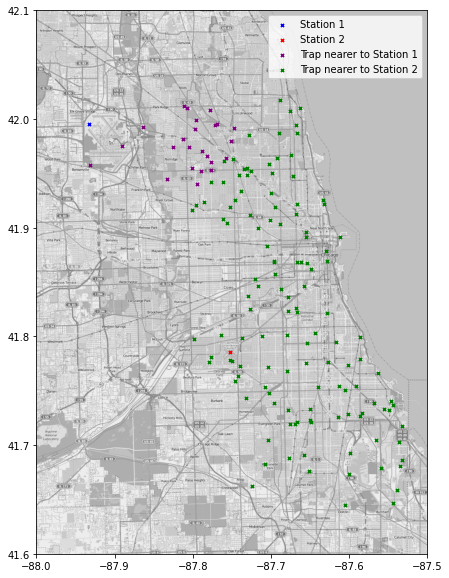

In [85]:
mapdata = np.loadtxt("../BackupData/mapdata_copyright_openstreetmap_contributors.txt/mapdata_copyright_openstreetmap_contributors.txt")
                     
#traps = pd.read_csv('./datasets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(7,10))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect='auto')

plt.scatter(-87.933, 41.995, marker='x', s= 10, c='blue', label='Station 1')
plt.scatter(-87.752, 41.786, marker='x', s= 10, c='red', label='Station 2')


locations = train_station_1[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x', s= 10, c='purple', label='Trap nearer to Station 1');

locations2 = train_station_2[['longitude', 'latitude']].drop_duplicates().values
plt.scatter(locations2[:,0], locations2[:,1], marker='x', s= 10, c='green', label='Trap nearer to Station 2');
plt.legend();

In [86]:
merge_df_weather = merge_df.merge(weather, on = ['date','station'], how = 'left')

In [87]:
merge_df_weather.head()

,date,species,latitude,longitude,trap,nummosquitos,wnvpresent,wnvcount,id,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,T048,1.0,0.0,0.0,NaN,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.0,29.44,30.09,5.8,16,7.4,5,4.35,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
1,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,T048,2.0,0.0,0.0,NaN,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.0,29.44,30.09,5.8,16,7.4,5,4.35,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
2,2007-05-29,CULEX RESTUANS,41.862292,-87.648860,T091,1.0,0.0,0.0,NaN,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.0,29.44,30.09,5.8,16,7.4,5,4.35,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
3,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,T049,1.0,0.0,0.0,NaN,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.0,29.44,30.09,5.8,16,7.4,5,4.35,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0
4,2007-05-29,CULEX RESTUANS,41.907645,-87.760886,T153,1.0,0.0,0.0,NaN,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.0,29.44,30.09,5.8,16,7.4,5,4.35,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0


### Weather lag to train/test dataset

**Weather Lag**

Given favourable conditions, mosquitos will take time to breed and grow to become adult mosquitos which can carry the WNV. As such there is a need to lag the weather variable to cater for this interval. The Culex species of mosquitos generally take about 7-10 days from egg to adult. As such, we will create a variety of weather lags from 5 to 21 days and experiment to see which will produce the best results.

#### First to remove similar weather variables
There are multiple weather variables that are highly collinear and conceptually similar. A representative in each of these groups will be selected to represent them.

In [88]:
weather_lag[['heat', 'cool' , 'tmax', 'tmin', 'tavg']].corr()

,heat,cool,tmax,tmin,tavg
heat,1.000000,-0.526419,-0.858549,-0.816237,-0.869345
cool,-0.526419,1.000000,0.829930,0.859412,0.875051
tmax,-0.858549,0.829930,1.000000,0.859981,0.967861
tmin,-0.816237,0.859412,0.859981,1.000000,0.960682
tavg,-0.869345,0.875051,0.967861,0.960682,1.000000


Of the temperature variables, only 'tavg' will be retained.

In [89]:
weather_lag.drop(columns=['heat', 'cool' , 'tmax', 'tmin'], axis=1, inplace=True)

In [90]:
# to weed out possible multicollinear variables
corr_abs = weather_lag.select_dtypes([np.number]).corr().abs() # get absolute correlations
corr_series = corr_abs.unstack()                         # convert df to series
corr_sorted = corr_series.sort_values(ascending=False)   # sort series of correlations
corr_sorted = corr_sorted[corr_sorted != 1]              # remove corr = 1, ie correlate with itself
corr_sorted[:20]

sunset       sunrise        0.984461
sunrise      sunset         0.984461
wetbulb      dewpoint       0.940948
dewpoint     wetbulb        0.940948
wetbulb      tavg           0.929224
tavg         wetbulb        0.929224
resultspeed  avgspeed       0.907093
avgspeed     resultspeed    0.907093
month        sunrise        0.899007
sunrise      month          0.899007
tavg         dewpoint       0.881859
dewpoint     tavg           0.881859
month        sunset         0.835068
sunset       month          0.835068
tavg         sunset         0.583986
sunset       tavg           0.583986
             wetbulb        0.530309
wetbulb      sunset         0.530309
tavg         sunrise        0.500671
sunrise      tavg           0.500671
dtype: float64

Of sunset and sunrise, sunset will be retained<br/>
Of dewpoint and wetbulb, dewpoint will be retained<br/>
Of resultspeed and avgspeed, avgspeed will be retained

In [91]:
weather_lag.drop(columns=['sunrise', 'wetbulb' , 'resultspeed'], axis=1, inplace=True)

In [92]:
weather_lag.columns

Index(['station', 'tavg', 'dewpoint', 'codesum', 'preciptotal', 'stnpressure',
       'sealevel', 'resultdir', 'avgspeed', 'month', 'sunset', 'bcfg', 'br',
       'dz', 'fg', 'fg+', 'fu', 'hz', 'mifg', 'ra', 'sn', 'sq', 'ts', 'tsra',
       'vcts', 'gr', 'vcfg', 'date_2_lag', 'date_3_lag', 'date_5_lag',
       'date_7_lag', 'date_14_lag', 'date_21_lag', 'date_28_lag'],
      dtype='object')

In [93]:
# Converting the lag date columns to datetime
lag_dates = ['date_2_lag', 'date_3_lag', 'date_5_lag', 'date_7_lag', 'date_14_lag',
       'date_21_lag', 'date_28_lag']

for col in lag_dates:
    weather_lag[col] = pd.to_datetime(weather_lag[col])

In [94]:
# Creating a function to merge train data based on lag weather data.
def merge_lag_dfs(lag_date):
    new_merge_df = merge_df.merge(
    weather_lag,
    left_on=['date', 'station'],
    right_on=[lag_date, 'station'],
    how='left'
    )

    new_merge_df.drop(columns=lag_dates, axis=1, inplace=True)
    
    return new_merge_df

In [95]:
# Creating df with lag weather of 5, 7, 14 and 21 days
merge_df_weather_5_lag = merge_lag_dfs('date_5_lag')
merge_df_weather_7_lag = merge_lag_dfs('date_7_lag')
merge_df_weather_14_lag = merge_lag_dfs('date_14_lag')
merge_df_weather_21_lag = merge_lag_dfs('date_21_lag')

In [96]:
# Saving merged data sets to csv
merge_df_weather.to_csv(r'../data/weather_cleaned_lag0.csv', index = False)
merge_df_weather_5_lag.to_csv(r'../data/weather_cleaned_lag5.csv', index = False)
merge_df_weather_7_lag.to_csv(r'../data/weather_cleaned_lag7.csv', index = False)
merge_df_weather_14_lag.to_csv(r'../data/weather_cleaned_lag14.csv', index = False)
merge_df_weather_21_lag.to_csv(r'../data/weather_cleaned_lag21.csv', index = False)

In [97]:
merge_df_weather_7_lag.columns

Index(['date', 'species', 'latitude', 'longitude', 'trap', 'nummosquitos',
       'wnvpresent', 'wnvcount', 'id', 'station', 'tavg', 'dewpoint',
       'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultdir',
       'avgspeed', 'month', 'sunset', 'bcfg', 'br', 'dz', 'fg', 'fg+', 'fu',
       'hz', 'mifg', 'ra', 'sn', 'sq', 'ts', 'tsra', 'vcts', 'gr', 'vcfg'],
      dtype='object')

### Merging spray with weather/train/test dataset

In [98]:
spray.head()

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [99]:
# Creating a function to check if trap were sprayed.
def sprayed(row, dist=0.001):

    # Accessing the trap's Latitude & Longitude.
    lat = row['latitude']
    lon = row['longitude']
    date = row['date']
    
    sprayed_date = spray[(spray['date'] == date)]
    
    for i in sprayed_date.index:
        
        # Calculating euclidean distance between the row's location and the spray's location (using values in Latitude and Longitude columns)
        spray_dist = (((spray.loc[i, 'latitude'] - lat) ** 2) + ((spray.loc[i, 'longitude'] - lon) ** 2)) ** 0.5
        
        # If sprayed distance is within the spray.
        if spray_dist <= dist:
            return 1
    
    # Return 0 if spray_dist > dist.
    return 0

In [100]:
# Applying function to new merged df.
merge_weather_spray = merge_df_weather.copy()
merge_weather_spray['sprayed'] = merge_df_weather.apply(sprayed, axis=1)

In [101]:
merge_weather_spray['sprayed'].value_counts()

0    124758
1        10
Name: sprayed, dtype: int64

Only 10 traps were identified to have been sprayed on the date of the traps were recorded.

In [102]:
merge_weather_spray.sort_values(by = 'nummosquitos', inplace = True)

## Save merged data (train + weather + spray)
Dataset is for EDA and exploration

In [103]:
merge_weather_spray.shape

(124768, 44)

In [104]:
train_merged = merge_weather_spray.iloc[0:8475].copy()

# to drop id columns
train_merged.drop(columns=['id'], axis=1, inplace=True)

# check no nas for train data
train_merged.isnull().sum()

date            0
species         0
latitude        0
longitude       0
trap            0
nummosquitos    0
wnvpresent      0
wnvcount        0
station         0
tmax            0
tmin            0
tavg            0
dewpoint        0
wetbulb         0
heat            0
cool            0
codesum         0
preciptotal     0
stnpressure     0
sealevel        0
resultspeed     0
resultdir       0
avgspeed        0
month           0
sunrise         0
sunset          0
bcfg            0
br              0
dz              0
fg              0
fg+             0
fu              0
hz              0
mifg            0
ra              0
sn              0
sq              0
ts              0
tsra            0
vcts            0
gr              0
vcfg            0
sprayed         0
dtype: int64

In [105]:
test_merged = merge_weather_spray.iloc[8475:].copy()
# check no NAN and cross check test original shape
print(f'Sum of null values in nummosquitos: {test_merged.nummosquitos.isnull().sum()}')
print(test.shape)

# check head if there are any values in nummosquitos | wnvcount	| wnvpresent
test_merged.head(3)

Sum of null values in nummosquitos: 116293
(116293, 6)


,date,species,latitude,longitude,trap,nummosquitos,wnvpresent,wnvcount,id,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg,sprayed
8475,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,T002,NaN,NaN,NaN,1.0,1,86,61,73.5,56,64.0,0.0,9.0,,0.0,29.28,29.99,8.9,18,10.0,6,4.266667,19.433333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0
8476,2008-06-11,CULEX RESTUANS,41.95469,-87.800991,T002,NaN,NaN,NaN,2.0,1,86,61,73.5,56,64.0,0.0,9.0,,0.0,29.28,29.99,8.9,18,10.0,6,4.266667,19.433333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0
8477,2008-06-11,CULEX PIPIENS,41.95469,-87.800991,T002,NaN,NaN,NaN,3.0,1,86,61,73.5,56,64.0,0.0,9.0,,0.0,29.28,29.99,8.9,18,10.0,6,4.266667,19.433333,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0


In [106]:
# drop columns for test_merged_weather set

test_merged = test_merged.drop(columns = ['nummosquitos','wnvcount', 'wnvpresent'])

In [107]:
# Save cleaned data to csv

train_merged.to_csv(r'../data/merged_train.csv', index = False) # Combined both weather and spray data
test_merged.to_csv(r'../data/merged_test.csv', index = False) # Combined both weather and spray data

## Deeper Exploratory Data Analysis

In [108]:
# read in merged data

train_merged = pd.read_csv('../data/merged_train.csv')
train_merged['date'] = pd.to_datetime(train_merged['date'])

In [109]:
train_merged.head()

,date,species,latitude,longitude,trap,nummosquitos,wnvpresent,wnvcount,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,sunrise,sunset,bcfg,br,dz,fg,fg+,fu,hz,mifg,ra,sn,sq,ts,tsra,vcts,gr,vcfg,sprayed
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,T048,1.0,0.0,0.0,2,88,65,76.5,59,66.0,0.0,12.0,BR HZ,0.00,29.44,30.09,5.8,16,7.4,5,4.35,19.283333,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0.0,0.0,0
1,2009-09-25,CULEX PIPIENS,41.776156,-87.778927,T155,1.0,0.0,0.0,2,70,60,65.0,57,60.0,0.0,0.0,RA DZ BR,0.02,29.44,30.11,5.4,11,6.3,9,5.70,17.733333,0,1,1,0,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0
2,2009-09-25,CULEX RESTUANS,41.923738,-87.785288,T013,1.0,1.0,1.0,2,70,60,65.0,57,60.0,0.0,0.0,RA DZ BR,0.02,29.44,30.11,5.4,11,6.3,9,5.70,17.733333,0,1,1,0,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0
3,2009-09-25,CULEX RESTUANS,41.960616,-87.777189,T017,1.0,0.0,0.0,1,70,60,65.0,57,60.0,0.0,0.0,RA DZ BR,0.16,29.39,30.12,5.4,11,7.3,9,5.70,17.733333,0,1,1,0,0,0,0,0.0,1,0,0,0,0,0,0.0,0.0,0
4,2007-08-24,CULEX RESTUANS,41.662014,-87.724608,T135,1.0,0.0,0.0,2,81,69,75.0,67,69.0,0.0,10.0,TS TSRA RA BR,0.20,29.16,29.81,5.5,25,7.3,8,5.15,18.666667,0,1,0,0,0,0,0,0.0,1,0,0,1,1,0,0.0,0.0,0


In [110]:
# create week column 
train_merged['week'] = train_merged.loc[:,'date'].dt.isocalendar().week
train_merged['year'] = train_merged.loc[:,'date'].dt.year

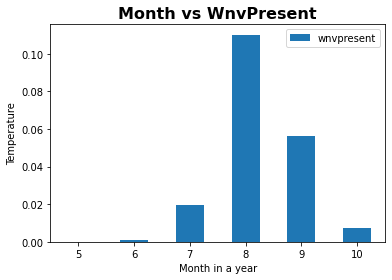

In [111]:
# monthly trend of average temperature
train_merged.groupby('month').mean()[['wnvpresent']].plot.bar()
plt.xlabel('Month in a year')
plt.ylabel('Temperature')
plt.title('Month vs WnvPresent', fontdict={'fontsize': 16, 'weight': 'bold'})
plt.xticks(rotation=0);

We can see that generally across the years, the wnv will peak on August. 

In [129]:
# define function that takes in df and which year to produce trend for num of mosquitos, vs wnvpresent and tavg

def plot_trend_wnv(df, year):
    dataset = df[df['year']== year]
    # creating separate df to compile SUM of mosquitos by species
    dataset_sub = dataset[(dataset['species']== 'CULEX PIPIENS') | (dataset['species']== 'CULEX RESTUANS') | (dataset['species']== 'CULEX PIPIENS/RESTUANS')]

    dataset_sub = dataset_sub.groupby(['month', 'week','species']).sum()['nummosquitos'].reset_index()
    dataset_sub[dataset_sub.species == 'CULEX PIPIENS']

    new_df = dataset_sub[['month', 'week']]
    new_df.loc[:,'pipiens_num'] = dataset_sub[dataset_sub.species == 'CULEX PIPIENS']['nummosquitos']
    new_df.loc[:,'restuans_num'] = dataset_sub[dataset_sub.species == 'CULEX RESTUANS']['nummosquitos']
    new_df.loc[:,'mix_pip&restuans_num'] = dataset_sub[dataset_sub.species == 'CULEX PIPIENS/RESTUANS']['nummosquitos']

    new_df = new_df.groupby(['week','month']).mean()

    # Plot subsplots with main y-axis = Sum of No. of mosquitos 
    fig, ax1 = plt.subplots() 

    new_df.plot.bar(figsize= (30,10), ax = ax1)
    plt.legend(loc='upper right', fontsize = 24)

    # set labels for left y-axis 
    plt.ylabel('Sum of No. of mosquitos by Species', fontdict={'size': 20}) 
    plt.xlabel('By (Week, Month)', fontdict={'size': 20})
    plt.ylim(0,8000)
    plt.xticks(rotation=0, size= 20)
    plt.yticks(size= 20)


    # create df for wnv and tavg line plots 
    analyse_df1 = dataset.groupby(['week','month']).sum()[['wnvpresent']]
    analyse_df2 = dataset.groupby(['week']).mean()[['tavg']].reset_index().drop(columns= ['week'])

    # Adding Twin Axes for wnvpresent (Red solid line )
    ax2 = ax1.twinx()  

    analyse_df1.plot.line(figsize= (30,10), ax = ax2, color = 'red')

    plt.legend(loc='upper left', fontsize = 24)

    # Adding Twin Axes for tavg (Dark Blue Dotted Line)
    analyse_df2.plot.line(figsize= (30,10), ax = ax2, color = 'darkblue', ls =  '--', lw = 3)
    plt.ylim(0,120)
    plt.legend(loc='upper left',fontsize = 24)

    # Add label
    plt.title(f'WnvPresent trend in {year}', fontsize= 20, weight = 'bold')
    plt.ylabel('Sum of WnvPresent | Average Temperature') 

    # Show plot
    plt.grid(color = 'black', linestyle = '-.', linewidth = 0.5)
    plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


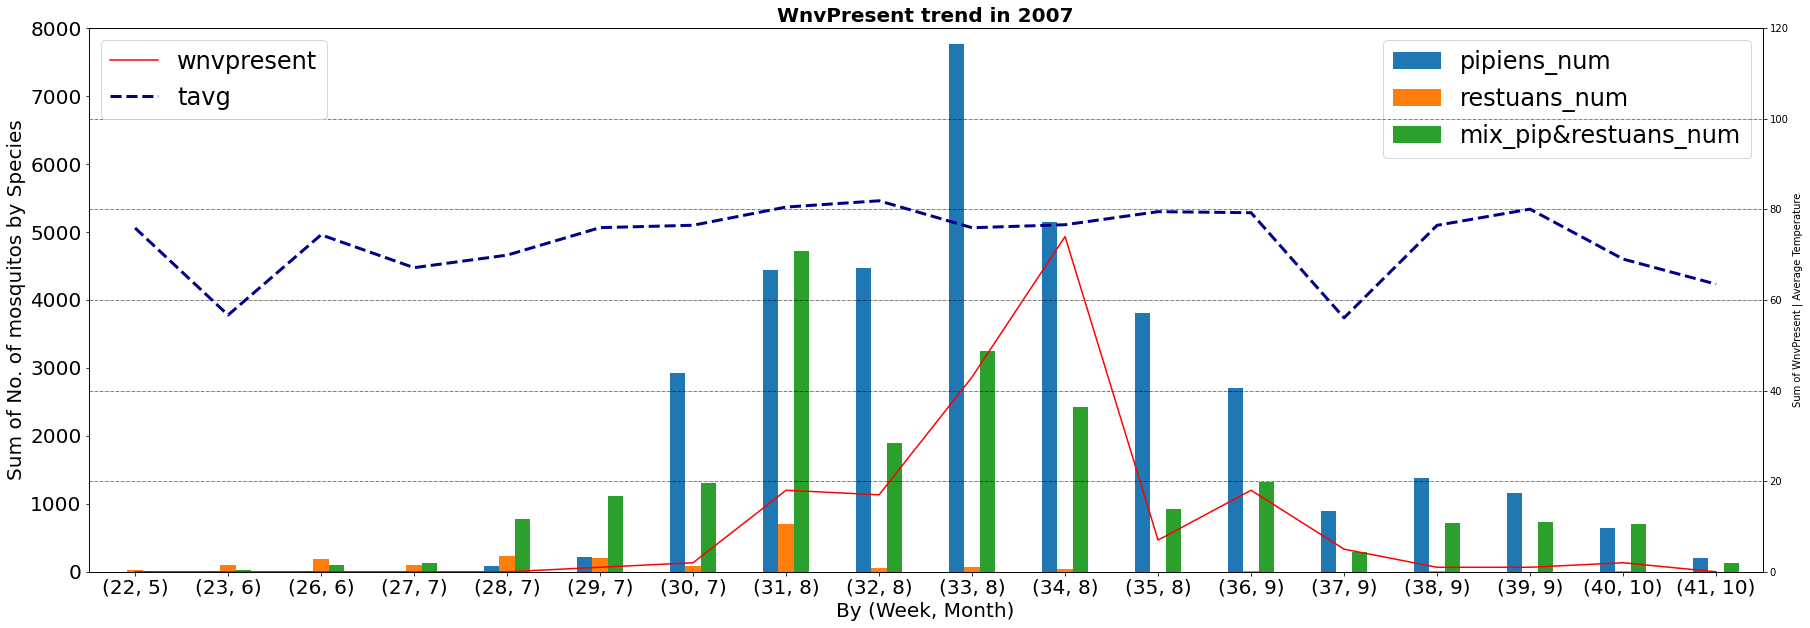

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


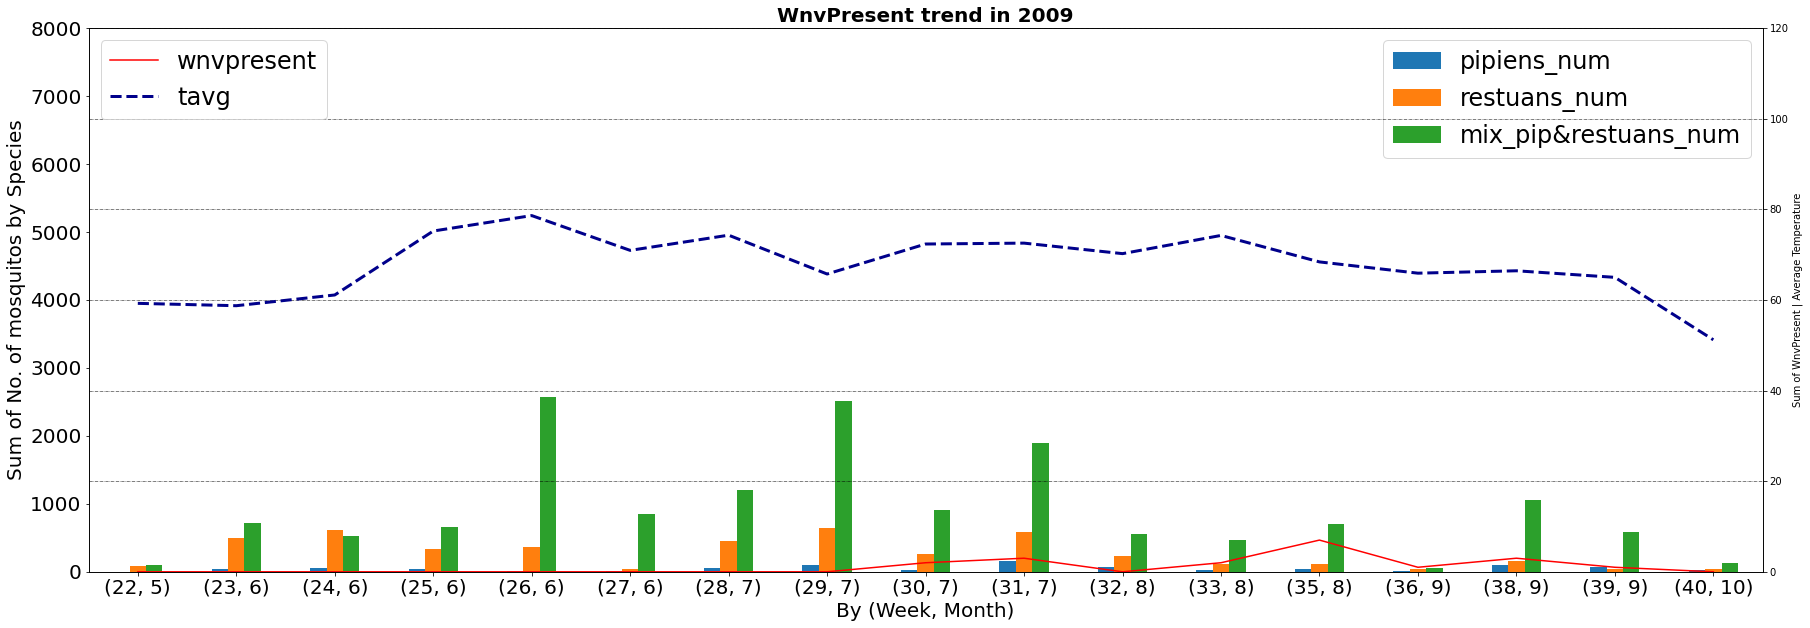

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


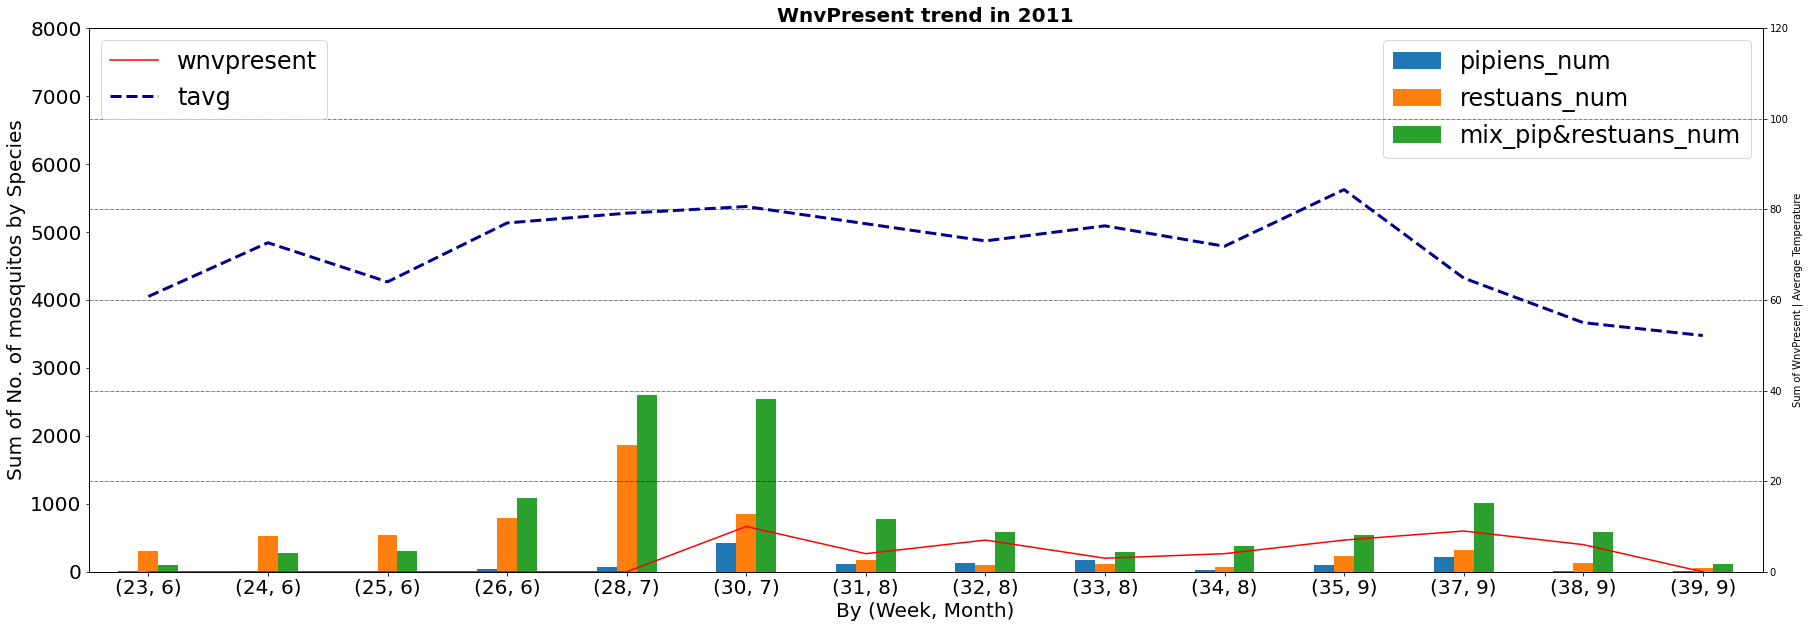

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


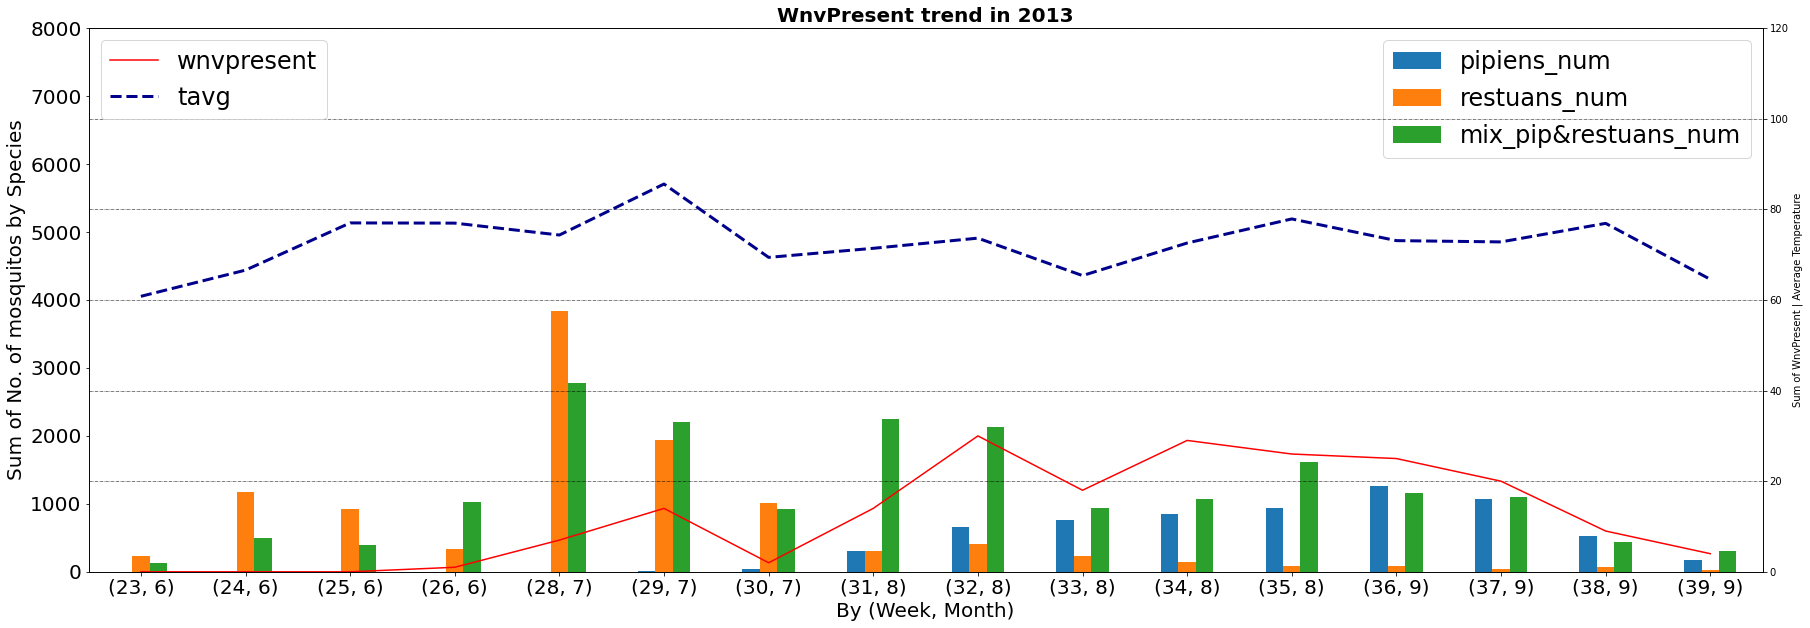

In [130]:
# plot yearly trends and compare if spray/avg temp has an impact 
years = [2007,2009,2011,2013]

for year in years:
    plot_trend_wnv(train_merged,year)

**Key Observations**
1) In 2007 and 2013, there seems to be a peak of WNVpresent during month of August which coincides with the increase in counts of CULEX PIPIENS. As for the other two years, there seem to be lesser mosquitos caught generally. This suggest that there might be some other factors that may be annual differences which influence the breeding of mosquitos.<br/>
2) Across all years, `Restuans species` population peaks during mid to end July while `Pipiens species` will tend to peak during August.<br/>
3) When `Restuans` peaked, `wnvpresent` counts did not see a spike. However when `Pipiens` started to rise, `wnvpresent` started to spike upwards as well. This suggest that `Pipiens` are more likely to affect the WNVpresent counts.


In [131]:
# monthly trend of average temperature

train_merged.groupby('month').mean()[['heat', 'cool']]

,heat,cool
month,,
5,3.679012,3.481481
6,1.809274,6.217651
7,0.067271,10.111641
8,0.003636,10.529091
9,2.221880,7.351823
10,3.268939,3.109848


This should not be in continuous variable analysis as it depicts average cooling or heating component during hot and cold seasons.

Naturally if we see on August having very high temp, for sure heating will be set at zero and cooling will be set at max. As temperature is believe to be a crucial factor to mosquito activity based ([source](https://blog.mosquito.buzz/how-weather-affects-mosquito-activity)), the higher the temp, the higher the cooling effect needed to dampen the overall temp, displaying positive correlation. It will not make sense to compare with the number of mosquitos as it will sure show positive correlation of cooling effect to num of mosquitos. This high collinearity may have impact on the model results. We can explore both in our models and test based on mse and also view correlation to num of mosquitos.

### Analysis on what correlates to WNV present

Checking code sum should only have these based on Daily Table format given by Kaggle 

`TS` - Thunderstorm

`RA` - Rain

`FG` - Fog

`FG+` - Heavy Fog 

`BR` - Mist

`DZ` - Drizzle 

`HZ` - Haze

`VSTS` - Vicinity Thunderstorm




In [132]:
# Generating columns that is not object and do not contain some of the variables in list
cont_var = [col for col in train_merged if \
    (train_merged[col].dtypes != 'O') &\
    (col not in ['date','latitude', 'longitude', 'wnvcount', 'station','heat','cool'])]

# drop these columns as there are NAN values 
heatmap_df = train_merged[cont_var].loc[0:8474]
heatmap_df.drop(columns = ['bcfg', 'fg+','fu','mifg','sn','sq','gr','vcfg'], inplace = True)

<AxesSubplot:>

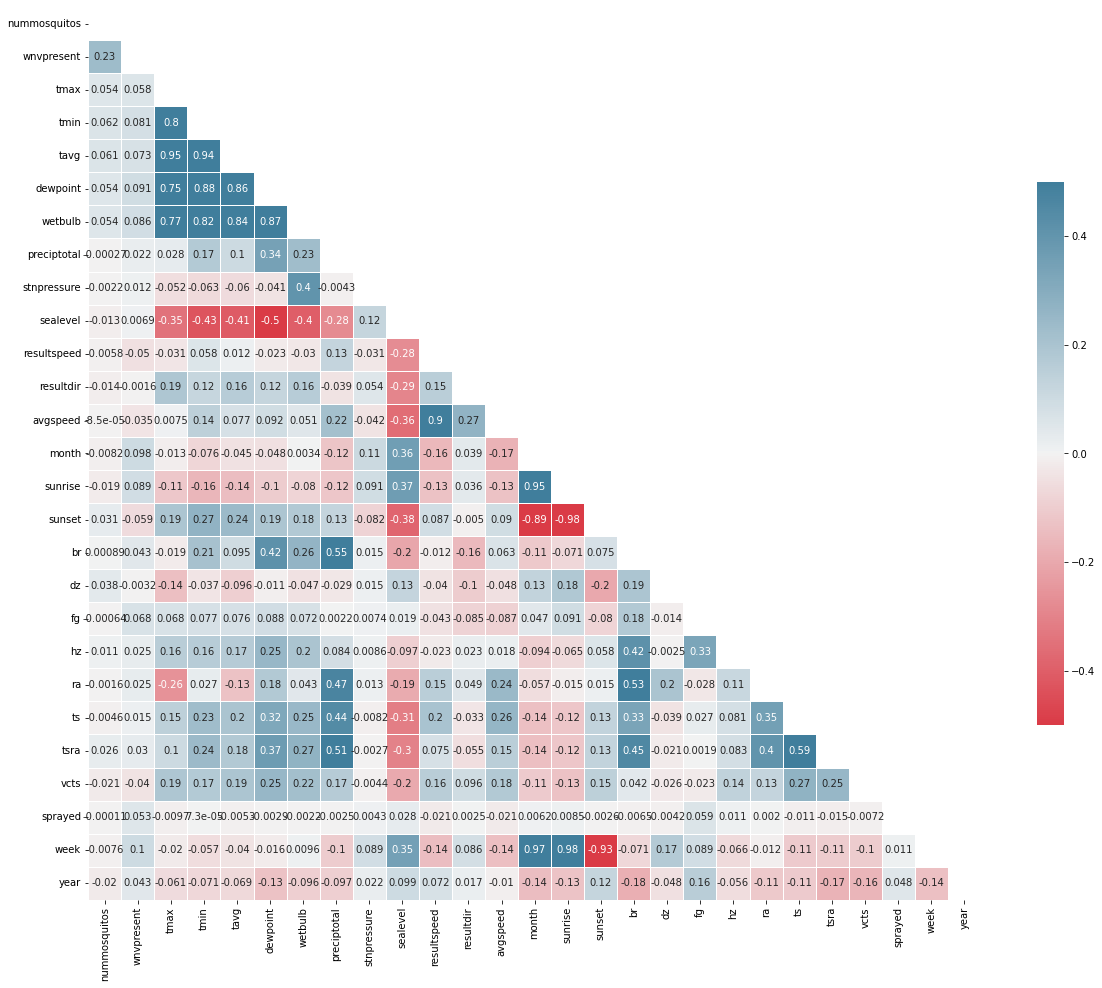

In [133]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(heatmap_df.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 230, as_cmap=True)

# Draw the heatmap_df with the mask and correct aspect ratio
sns.heatmap(heatmap_df.corr(), mask=mask, cmap=cmap, vmax=0.5, vmin = -0.5,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True)

In [134]:
heatmap_df.corr()['wnvpresent'].sort_values(ascending = False)

wnvpresent      1.000000
nummosquitos    0.233532
week            0.100561
month           0.097948
dewpoint        0.090837
sunrise         0.089441
wetbulb         0.086160
tmin            0.080751
tavg            0.072601
fg              0.068291
tmax            0.057976
sprayed         0.052663
br              0.043244
year            0.043038
tsra            0.030306
hz              0.024563
ra              0.024551
preciptotal     0.021732
ts              0.015412
stnpressure     0.011515
sealevel        0.006938
resultdir      -0.001574
dz             -0.003209
avgspeed       -0.035347
vcts           -0.039662
resultspeed    -0.049942
sunset         -0.058682
Name: wnvpresent, dtype: float64

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet.

From the heatmap, few observations were observed. 

1) Generally, having `tavg`, `wetbulb`, `thunderstorm`, `rain` have a positive correlation with number of mosquitoes while `preciptotal`, `sealevel`, `resultspeed` and `drizzle` has a slight negative correlation. These features may be usefull in modelling later on. <br/>
2) We can see that `dewpoint` and `wetbulb` is highly correlated to `avg temperature`, suggesting that overall temperature has influence on the two variables. The `higher the dewpoint and temperature`, the `higher the relatively humidity` of the environment. Based on ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7068582/)), `humidity` shows `positive correlation` with the `numbers of species sampled from the traps`. <br/>
3) Both `avgspeed and resultspeed` has a negative correlation to the num of mosquitos, indicating that the strong the wind, the lesser the mosquitos. Based on ([source](https://kestrelmeters.com/blogs/news/the-science-of-mosquito-abatement#:~:text=Wind%20works%20as%20a%20natural,MPH%20wind%20gust%20is%20substantial)), strong wind serves as natural repellent as mosquitos cannot fly through strong wind. <br/>
4) The average speed has relative high correlation to weather conditions like `thunderstorm` and `drizzle` suggesting its used to help predict weather patterns and global climate.<br/>
5) `Preciptotal`, `drizzle`, `tsra: moderate thunderstorm and rain` seems to have a negative correlation to number of mosquitos, probably due to the skewness of the distribution of precipitation levels. This is unexpected, as usually, it is understood that mosquitos need water to start breeding. However, based on ([source](https://maggiesfarmproducts.com/blogs/bug-help/weather-mosquito-activity#:~:text=Moisture%20plays%20an%20important%20role,to%20an%20increase%20in%20breeding.)), it seems like heavier rain will make it difficult for them to fly. <br/>
6) `vcts` which stands for `Vicinity thunderstorm`, has negative correlation to `wnvpresent` due to the fact that severe weathers like this occurs on the warm side of the warm front, where the greatest directional wind shear is located near that warm front boundary. Hence stronger wind would repel mosquitos. Also there are lesser precipitation invovled ([weather.gov](https://www.weather.gov/source/zhu/ZHU_Training_Page/thunderstorm_stuff/Thunderstorms/thunderstorms.htm))